**Importing the Packages**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Loading the Dataset**

In [60]:
df = pd.read_csv('/content/spotify_millsongdata.csv')
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


**Understanding the dataset**

In [61]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [62]:
df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [63]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/z/zwan/heartsong_20148991.html,I've got sunshine on a cloudy day \r\nWhen it...
freq,191,35,1,6


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [65]:
df.columns

Index(['artist', 'song', 'link', 'text'], dtype='object')

In [66]:
df.shape

(57650, 4)

In [67]:
df.dtypes

,0
artist,object
song,object
link,object
text,object


In [68]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [69]:
df['artist'].value_counts().head(10) # Top 10 artists

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


sampling the rows got jumbled has no order of index so we reset the index

In [70]:
df = df.sample(10000) # sampling random 10,000 songs from dataframe
df = df.drop('link', axis=1).reset_index(drop=True) #Dropping link col s we don't need for recommendation purpose

In [71]:
df.shape

(10000, 3)

In [72]:
df.head() # order of rows got changed

,artist,song,text
0,Olivia Newton-John,Tutta La Vita,Twice in a lifetime if you're really really lu...
1,Pet Shop Boys,Breathing Space,When your heart is out of line \r\nAnd you're...
2,Nirvana,Swap Meet,They lead a lifetime that is comfortable \r\n...
3,Justin Timberlake,Losing My Way,"Hey, excuse me \r\n \r\nHi, my name is Bob, ..."
4,Lenny Kravitz,In My Life Today,When my memory starts to wander \r\nI sit bac...


In [73]:
# wordcloud helps to understand the words(Text) present in the dataset
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)


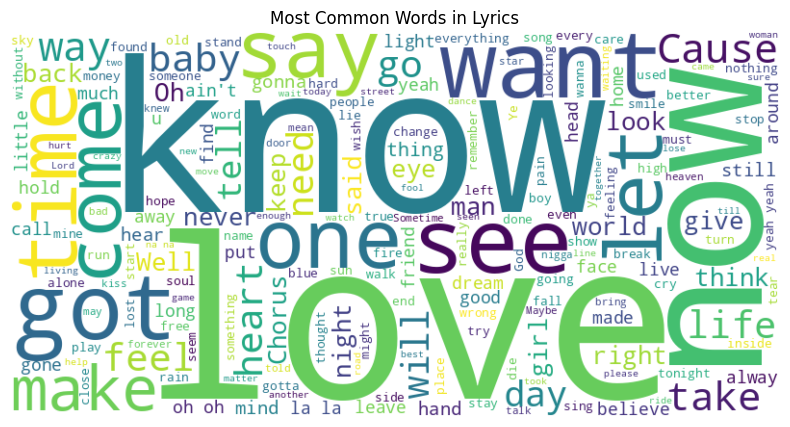

In [74]:
# WordCloud to visualize the most common words in the lyrics.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

**Data Preprocessing**

In [75]:
#Natural Language Toolkit
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
stop_words = set(stopwords.words('english')) # want to do recommendations based on the content not the sifnificant words

In [77]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens) # join text with space

In [78]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [79]:
df.head()

,artist,song,text,cleaned_text
0,Olivia Newton-John,Tutta La Vita,Twice in a lifetime if you're really really lu...,twice lifetime youre really really lucky may d...
1,Pet Shop Boys,Breathing Space,When your heart is out of line \r\nAnd you're...,heart line youre feeling left behind seems fai...
2,Nirvana,Swap Meet,They lead a lifetime that is comfortable \r\n...,lead lifetime comfortable travel far keep stom...
3,Justin Timberlake,Losing My Way,"Hey, excuse me \r\n \r\nHi, my name is Bob, ...",hey excuse hi name bob work job make fortysome...
4,Lenny Kravitz,In My Life Today,When my memory starts to wander \r\nI sit bac...,memory starts wander sit back ponder whole wor...


In [80]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [81]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [82]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [83]:
df["song"][2]

'Swap Meet'

In [85]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("Swap Meet")
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
              artist                              song
1371      Gucci Mane                       Close To Me
3529      Paul Simon              Loves Me Like A Rock
1966         Chicago              Lets Take A Lifetime
7876             Omd            Very Close To Far Away
9492  Modern Talking  You're My Heart - You're My Soul
